In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cell 2: Load Data
# Load the job posting data from the CSV file.

data_path = 'data/job_postings.csv'  # Replace with the actual filename if needed.

try:
    df = pd.read_csv(data_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"Error: File not found at {data_path}. Please make sure the file is in the 'data' directory.")
    df = None # Set to none so the rest of the code does not produce errors.

# Optionally add a markdown cell below to explain the data.

Data loaded successfully!


# Basic Data Inspection Notes

This cell provides a quick overview of the loaded dataset. We examine its dimensions, column data types, basic statistical measures for numerical columns, and the presence of missing values. This step helps us understand the initial structure and quality of the data.

In [24]:
# Cell 3: Basic Data Inspection

if df is not None: #only proceed if data was loaded successfully.
    print("Data Shape:")
    print(df.shape)  # Prints the number of rows and columns.

    print("\nColumn Information:")
    print(df.info()) #prints data types and non null counts

    print("\nBasic Statistics for Numerical Columns:")
    print(df.describe()) #prints statistics like mean, std, min, max.

    print("\nCheck for Null Values:")
    print(df.isnull().sum()) #prints total null values for each column.

Data Shape:
(32672, 16)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32672 entries, 0 to 32671
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_title_short        32672 non-null  object 
 1   job_title              32672 non-null  object 
 2   job_location           32672 non-null  object 
 3   job_via                32672 non-null  object 
 4   job_schedule_type      32531 non-null  object 
 5   job_work_from_home     32672 non-null  bool   
 6   search_location        32672 non-null  object 
 7   job_posted_date        32672 non-null  object 
 8   job_no_degree_mention  32672 non-null  bool   
 9   job_health_insurance   32672 non-null  bool   
 10  job_country            32672 non-null  object 
 11  salary_rate            32672 non-null  object 
 12  salary_year_avg        22036 non-null  float64
 13  salary_hour_avg        10636 non-null  float64
 14  company_n

# Data Cleaning - Missing Values and Job Skills Imputation Notes

This cell performs several data cleaning tasks, focusing on handling missing values and imputing job skills based on job titles.

**Job Skills Imputation:**

* A custom function `impute_job_skills()` is defined to fill missing `job_skills` values.
* The function analyzes the `job_title` column and assigns a list of relevant skills based on keywords in the title (e.g., "data science," "software engineer," "marketing," "analyst").
* If a job title doesn't match any predefined keywords, it assigns "General Skills."
* This approach provides more meaningful skill information than simply filling with a placeholder like "Unknown."

**Job Schedule Type Imputation:**

* Missing `job_schedule_type` values are filled based on the `salary_rate`. If the salary rate contains "year", the job_schedule_type is filled with "Full-time", and if the salary rate contains "hour", the job_schedule_type is filled with "Part-time".
* Any remaining missing values are filled with the mode of the column.

**Salary Imputation:**

* Missing values in the `salary_year_avg` and `salary_hour_avg` columns are filled with their respective medians, which are less sensitive to outliers than the mean.

**Verification:**

* Finally, the cell prints the sum of null values for each column to confirm that all missing values have been handled.

In [26]:
# Cell 4: Data Cleaning - Missing Values (Job Skills Imputation)

if df is not None:
    # Function to impute job skills based on job title.
    def impute_job_skills(row):
        if pd.isnull(row['job_skills']):
            title = row['job_title'].lower()
            if 'data science' in title or 'data scientist' in title:
                return 'Python, R, SQL, Machine Learning, Statistics'
            elif 'software engineer' in title or 'developer' in title:
                return 'Python, Java, JavaScript, C++, SQL'
            elif 'marketing' in title or 'digital marketing' in title:
                return 'SEO, SEM, Social Media, Content Marketing, Analytics'
            elif 'analyst' in title or 'business analyst' in title:
                return 'SQL, Excel, Data Analysis, Reporting, Communication'
            else:
                return 'General Skills'  # Default for titles we don't recognize.
        else:
            return row['job_skills']

    # Apply the imputation function.
    df['job_skills'] = df.apply(impute_job_skills, axis=1)

    # Fill missing 'job_schedule_type' based on salary rate.
    df['job_schedule_type'] = df.apply(
        lambda row: 'Full-time' if pd.isnull(row['job_schedule_type']) and 'year' in row['salary_rate'].lower()
        else ('Part-time' if pd.isnull(row['job_schedule_type']) and 'hour' in row['salary_rate'].lower()
              else row['job_schedule_type']),
        axis=1
    )

    # Handle missing values in 'salary_year_avg' and 'salary_hour_avg' by filling with the median.
    df['salary_year_avg'].fillna(df['salary_year_avg'].median(), inplace=True)
    df['salary_hour_avg'].fillna(df['salary_hour_avg'].median(), inplace=True)

    # Recheck for missing values to confirm they've been handled.
    print("\nMissing Values After Handling:")
    print(df.isnull().sum())


Missing Values After Handling:
job_title_short          0
job_title                0
job_location             0
job_via                  0
job_schedule_type        0
job_work_from_home       0
search_location          0
job_posted_date          0
job_no_degree_mention    0
job_health_insurance     0
job_country              0
salary_rate              0
salary_year_avg          0
salary_hour_avg          0
company_name             0
job_skills               0
dtype: int64


<ipython-input-26-fb087763ea0d>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary_year_avg'].fillna(df['salary_year_avg'].median(), inplace=True)
<ipython-input-26-fb087763ea0d>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

# Data Cleaning - Duplicates Notes

This cell checks for and removes duplicate rows from the DataFrame. Removing duplicates ensures that our analysis is based on unique job postings.

In [27]:
# Cell 5: Data Cleaning - Duplicates

if df is not None:
    # Check for duplicate rows.
    duplicate_rows = df[df.duplicated()]

    print("Number of duplicate rows:", len(duplicate_rows))

    # Remove duplicate rows.
    df.drop_duplicates(inplace=True)

    print("\nData shape after removing duplicates:", df.shape)

Number of duplicate rows: 1

Data shape after removing duplicates: (32671, 16)


# Data Cleaning - Data Type Conversion Notes

This cell converts columns to their appropriate data types to ensure accurate analysis.

**'job_posted_date' Conversion:**
* The 'job_posted_date' column is converted to datetime objects using `pd.to_datetime()`.
* The `errors='coerce'` argument handles any parsing errors by setting invalid dates to `NaT` (Not a Time).

**Boolean Column Conversion:**
* The 'job_work_from_home', 'job_no_degree_mention', and 'job_health_insurance' columns are converted to boolean type using `astype(bool)`.

**Salary Column Conversion:**
* The 'salary_year_avg' and 'salary_hour_avg' columns are converted to numeric type using `pd.to_numeric()`.
* The `errors='coerce'` argument handles any non-numeric values by setting them to `NaN`.

**Verification:**
* The cell prints the data types of all columns after the conversion to confirm the changes.

In [28]:
# Cell 6: Data Cleaning - Data Type Conversion

if df is not None:
    # Convert 'job_posted_date' to datetime objects.
    df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')

    # Convert boolean columns to boolean type.
    bool_cols = ['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']
    for col in bool_cols:
        df[col] = df[col].astype(bool)

    # Convert salary columns to numeric, handling errors.
    df['salary_year_avg'] = pd.to_numeric(df['salary_year_avg'], errors='coerce')
    df['salary_hour_avg'] = pd.to_numeric(df['salary_hour_avg'], errors='coerce')

    print("\nData Types After Conversion:")
    print(df.dtypes)


Data Types After Conversion:
job_title_short                  object
job_title                        object
job_location                     object
job_via                          object
job_schedule_type                object
job_work_from_home                 bool
search_location                  object
job_posted_date          datetime64[ns]
job_no_degree_mention              bool
job_health_insurance               bool
job_country                      object
salary_rate                      object
salary_year_avg                 float64
salary_hour_avg                 float64
company_name                     object
job_skills                       object
dtype: object


# Outlier Detection and Handling Notes

This cell detects and handles outliers in the `salary_year_avg` and `salary_hour_avg` columns to prevent them from skewing our analysis.

**Outlier Detection:**

* The `detect_outliers()` function identifies outliers using the Interquartile Range (IQR) method.
* Outliers are defined as values outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR].
* The number of outliers found in each salary column is printed.

**Outlier Handling:**

* The `cap_outliers()` function caps the outliers to the upper and lower bounds.
* This approach replaces outliers with the boundary values, reducing their impact without removing them entirely.
* The capped salary columns are updated in the DataFrame.

**Importance:**

* Handling outliers before Exploratory Data Analysis (EDA) ensures that visualizations and statistical measures are not significantly influenced by extreme values, leading to more accurate insights.

In [36]:
# Cell 9: Outlier Detection and Handling

if df is not None:
    # Function to detect outliers using IQR method
    def detect_outliers(data):
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        return outliers

    # Detect outliers in salary columns
    salary_year_outliers = detect_outliers(df['salary_year_avg'])
    salary_hour_outliers = detect_outliers(df['salary_hour_avg'])

    print("Outliers in Salary Year Avg:", len(salary_year_outliers))
    print("Outliers in Salary Hour Avg:", len(salary_hour_outliers))

    # Handle outliers by capping them to the upper/lower bounds
    def cap_outliers(data):
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[data < lower_bound] = lower_bound
        data[data > upper_bound] = upper_bound
        return data

    df['salary_year_avg'] = cap_outliers(df['salary_year_avg'])
    df['salary_hour_avg'] = cap_outliers(df['salary_hour_avg'])

    print("\nOutliers handled.")

Outliers in Salary Year Avg: 2615
Outliers in Salary Hour Avg: 10613

Outliers handled.


<ipython-input-36-c7370fefe77c>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data < lower_bound] = lower_bound
<ipython-input-36-c7370fefe77c>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data > upper_bound] = upper_bound
<ipython-input-36-c7370fefe77c>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data < lower_bound] = lower_bound
<ipython-input-36-c7370fefe77c>:29: SettingWithCopyWarning: 
A value is tryi

# Exploratory Data Analysis (EDA) - Univariate Analysis Notes (Modified)

This cell performs univariate analysis, examining the distribution of individual columns, with modifications to the visualizations.

**Job Schedule Type Distribution (Top 5):**
* A countplot visualizes the frequency of the top 5 job schedule types.

**Work From Home Job Distribution (Pie Chart):**
* A pie chart shows the proportion of jobs that offer work-from-home options, making it easier to visualize the percentage breakdown.

**Job Posted Date Distribution (Line Chart):**
* A line chart displays the number of job postings over time, showing trends and fluctuations.

**Job Country Distribution (Top 5):**
* A countplot displays the top 5 countries with the highest number of job postings.

**Salary Year Average Distribution:**
* A histogram with a kernel density estimate (KDE) shows the distribution of yearly salaries.

**Salary Hour Average Distribution:**
* A histogram with KDE shows the distribution of hourly salaries.

These visualizations provide insights into the distribution and frequency of individual variables in the dataset, with improved clarity and focus on the most relevant data.

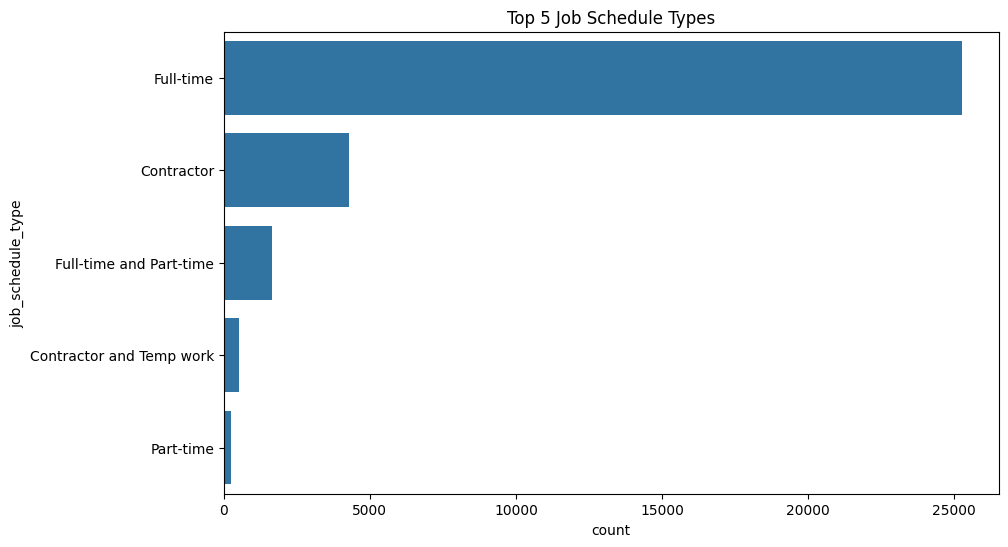

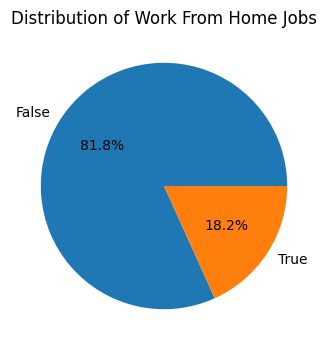

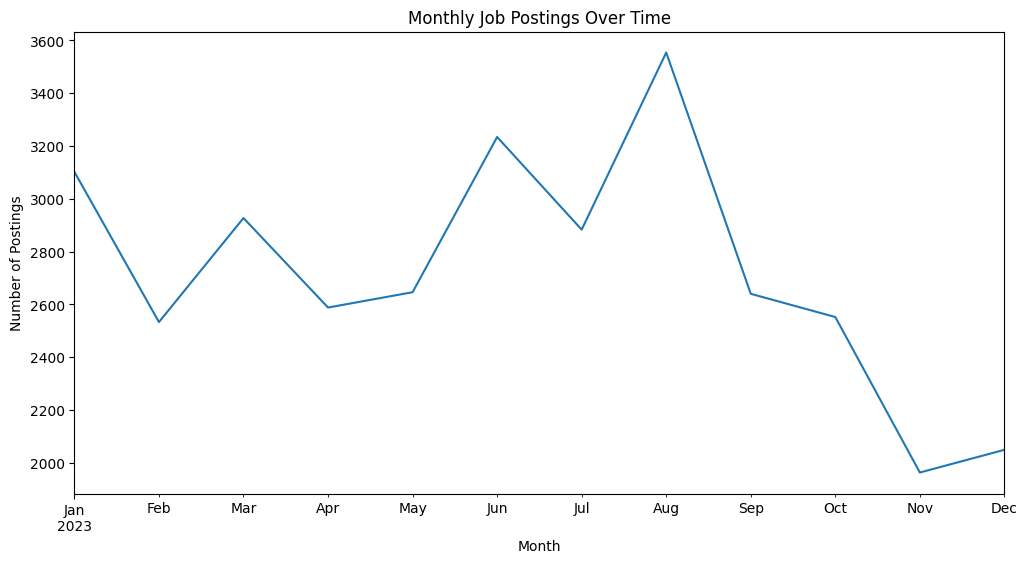

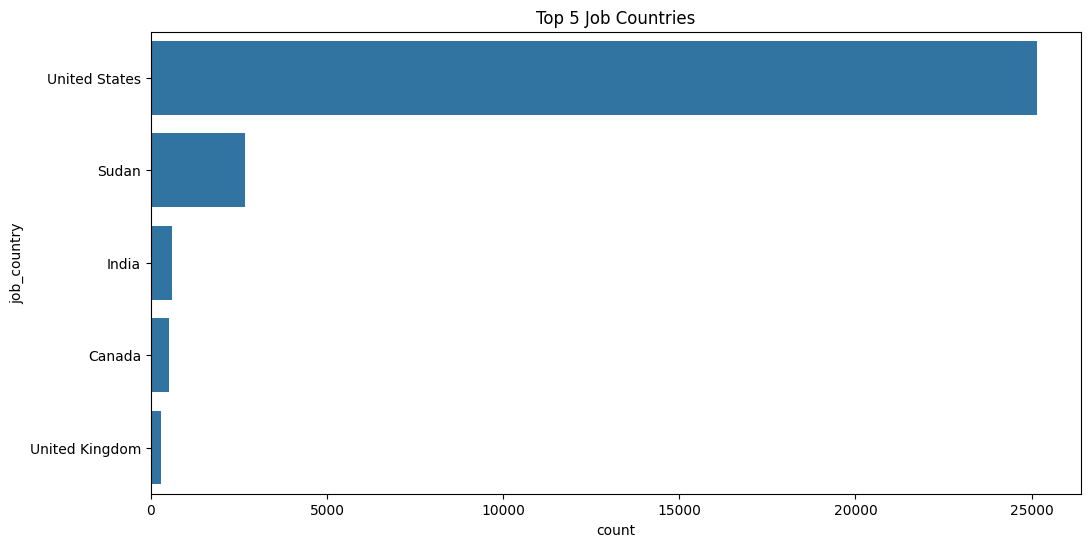

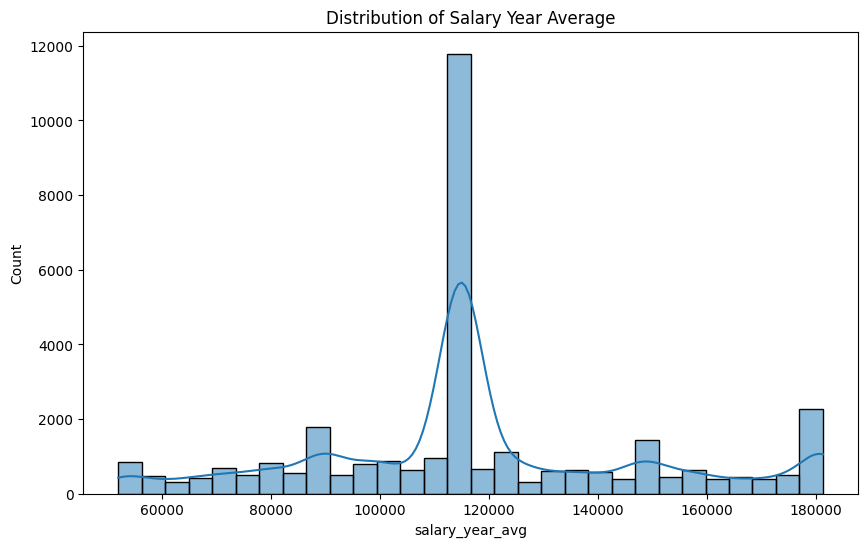

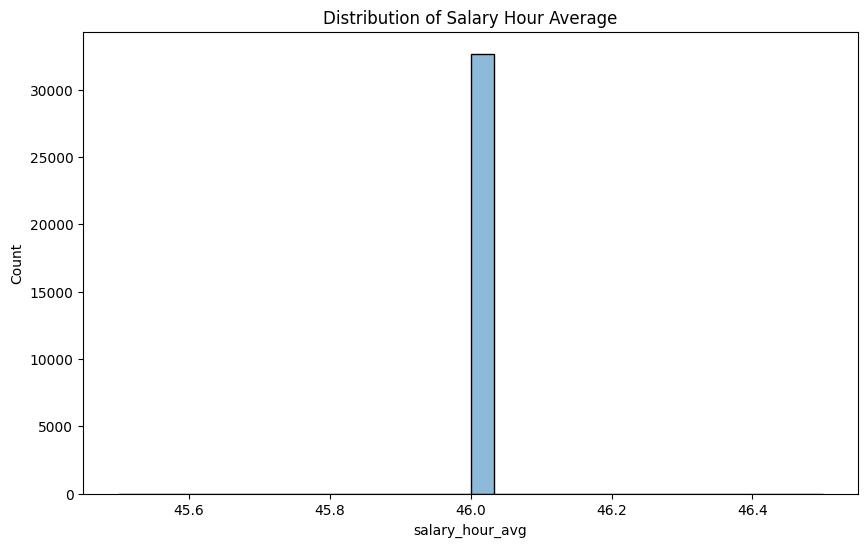

In [37]:
# Cell 7: Exploratory Data Analysis (EDA) - Univariate Analysis (Modified - Monthly Line Chart)

if df is not None:
    # Distribution of job schedule types (Top 5)
    plt.figure(figsize=(10, 6))
    top_schedule = df['job_schedule_type'].value_counts().nlargest(5).index
    sns.countplot(y='job_schedule_type', data=df, order=top_schedule)
    plt.title('Top 5 Job Schedule Types')
    plt.show()

    # Distribution of job work from home (Pie Chart)
    plt.figure(figsize=(6, 4))
    df['job_work_from_home'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Distribution of Work From Home Jobs')
    plt.ylabel('')
    plt.show()

    # Distribution of job posted date (Monthly Line Chart)
    if 'job_posted_date' in df.columns and pd.api.types.is_datetime64_any_dtype(df['job_posted_date']):
        monthly_counts = df['job_posted_date'].dt.to_period('M').value_counts().sort_index()
        plt.figure(figsize=(12, 6))
        monthly_counts.plot(kind='line')
        plt.title('Monthly Job Postings Over Time')
        plt.xlabel('Month')
        plt.ylabel('Number of Postings')
        plt.show()

    # Distribution of job country (Top 5)
    plt.figure(figsize=(12, 6))
    top_countries = df['job_country'].value_counts().nlargest(5).index
    sns.countplot(y='job_country', data=df, order=top_countries)
    plt.title('Top 5 Job Countries')
    plt.show()

    # Distribution of salary year average
    plt.figure(figsize=(10, 6))
    sns.histplot(df['salary_year_avg'].dropna(), bins=30, kde=True)
    plt.title('Distribution of Salary Year Average')
    plt.show()

    # Distribution of salary hour average
    plt.figure(figsize=(10, 6))
    sns.histplot(df['salary_hour_avg'].dropna(), bins=30, kde=True)
    plt.title('Distribution of Salary Hour Average')
    plt.show()

# Exploratory Data Analysis (EDA) - Bivariate Analysis Notes

This cell performs bivariate analysis, examining the relationships between pairs of columns.

**Job Schedule Type vs. Work From Home:**
* A countplot visualizes the relationship between job schedule type and work-from-home options.

**Job Country vs. Average Salary (Year):**
* A bar plot shows the average yearly salary for each job country.

**Job Country vs. Average Salary (Hour):**
* A bar plot shows the average hourly salary for each job country.

**Job Work From Home vs. Average Salary (Year):**
* A box plot displays the distribution of yearly salaries for jobs that offer and don't offer work-from-home options.

**Job Work From Home vs. Average Salary (Hour):**
* A box plot displays the distribution of hourly salaries for jobs that offer and don't offer work-from-home options.

These visualizations help us understand how different variables relate to each other in the job posting data.

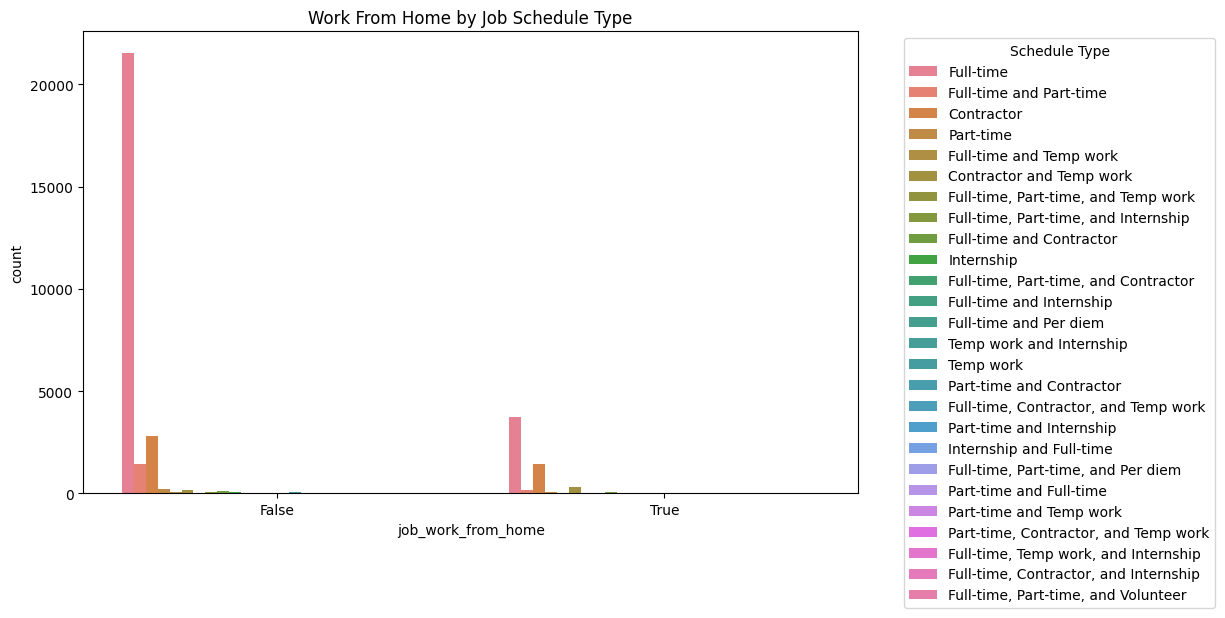

<ipython-input-38-b7de7af3a8a2>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='job_country', y='salary_year_avg', data=top_df, ci=None)


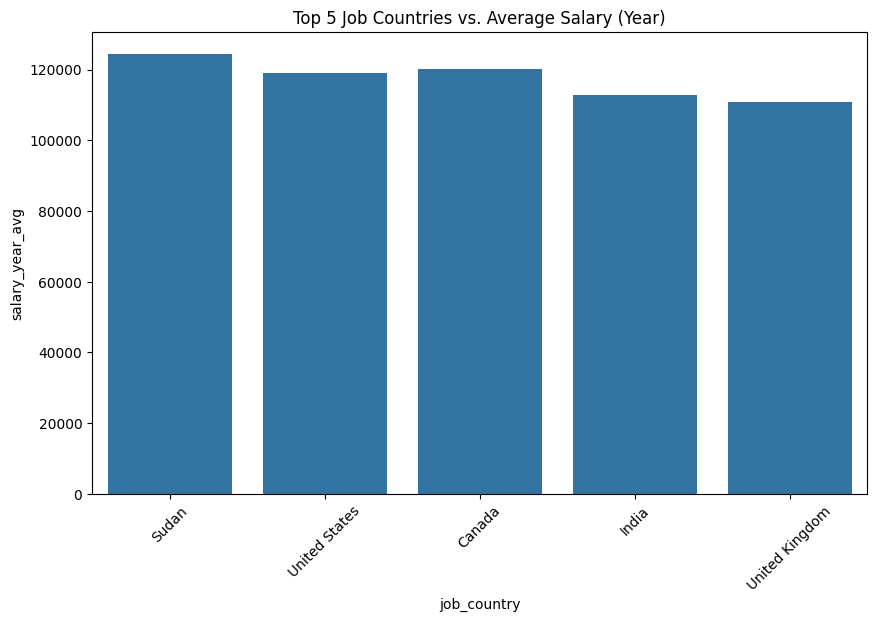

<ipython-input-38-b7de7af3a8a2>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='job_country', y='salary_hour_avg', data=top_df, ci=None)


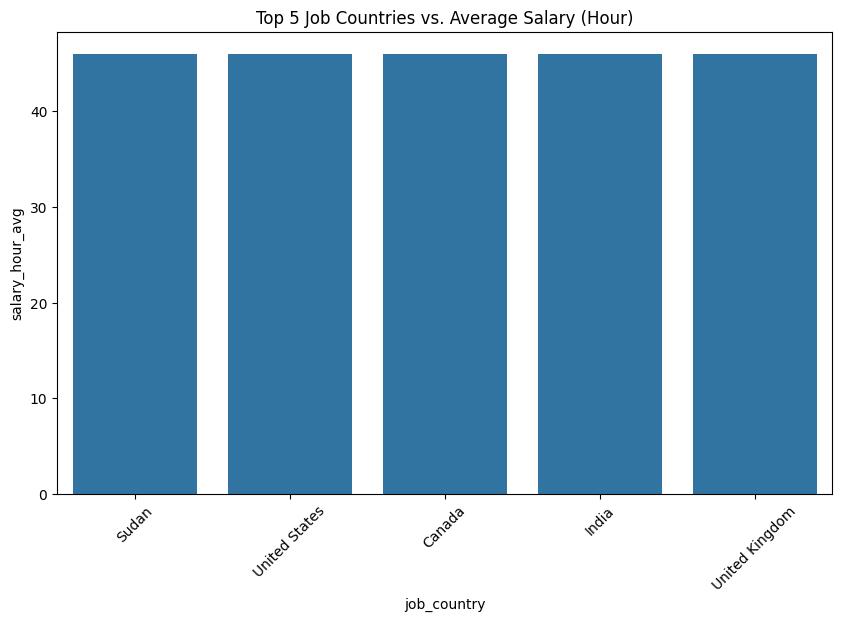

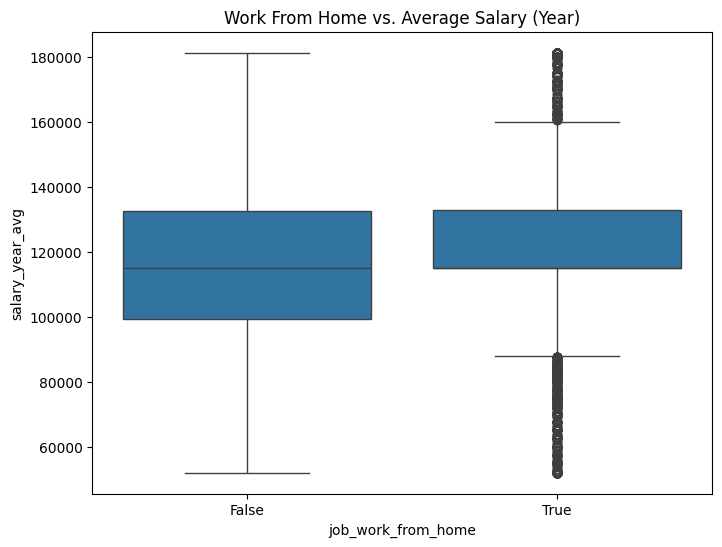

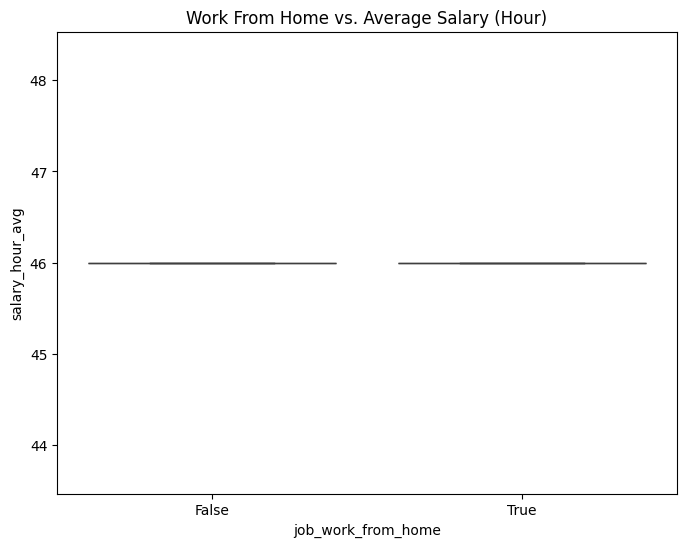

In [38]:
# Cell 8: Exploratory Data Analysis (EDA) - Bivariate Analysis (Less Noisy)

if df is not None:
    # Job Schedule Type vs. Work From Home (Simplified)
    plt.figure(figsize=(10, 6))
    sns.countplot(x='job_work_from_home', hue='job_schedule_type', data=df)
    plt.title('Work From Home by Job Schedule Type')
    plt.legend(title='Schedule Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # Top 5 Job Countries vs. Average Salary (Year)
    top_countries = df['job_country'].value_counts().nlargest(5).index
    top_df = df[df['job_country'].isin(top_countries)]
    plt.figure(figsize=(10, 6))
    sns.barplot(x='job_country', y='salary_year_avg', data=top_df, ci=None)
    plt.title('Top 5 Job Countries vs. Average Salary (Year)')
    plt.xticks(rotation=45)
    plt.show()

    # Top 5 Job Countries vs. Average Salary (Hour)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='job_country', y='salary_hour_avg', data=top_df, ci=None)
    plt.title('Top 5 Job Countries vs. Average Salary (Hour)')
    plt.xticks(rotation=45)
    plt.show()

    # Job Work From Home vs. Average Salary (Year) - Boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='job_work_from_home', y='salary_year_avg', data=df)
    plt.title('Work From Home vs. Average Salary (Year)')
    plt.show()

    # Job Work From Home vs. Average Salary (Hour) - Boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='job_work_from_home', y='salary_hour_avg', data=df)
    plt.title('Work From Home vs. Average Salary (Hour)')
    plt.show()

# Exploratory Data Analysis (EDA) - Correlation Analysis Notes

This cell examines the correlation between the numerical salary columns.

**Correlation Matrix:**

* The `corr()` method is used to calculate the correlation matrix for the `salary_year_avg` and `salary_hour_avg` columns.
* The correlation matrix shows the pairwise correlation coefficients between the columns, indicating the strength and direction of linear relationships.

**Heatmap:**

* A heatmap visualizes the correlation matrix, with color intensity representing the strength of the correlation.
* The `annot=True` parameter displays the correlation coefficients on the heatmap.
* The `cmap='coolwarm'` parameter sets the color palette.
* The `fmt=".2f"` parameter formats the correlation coefficients to two decimal places.

**Interpretation:**

* By examining the heatmap, we can identify any strong correlations between the salary columns.
* A high positive correlation suggests that as one salary column increases, the other tends to increase as well.
* A high negative correlation suggests an inverse relationship.

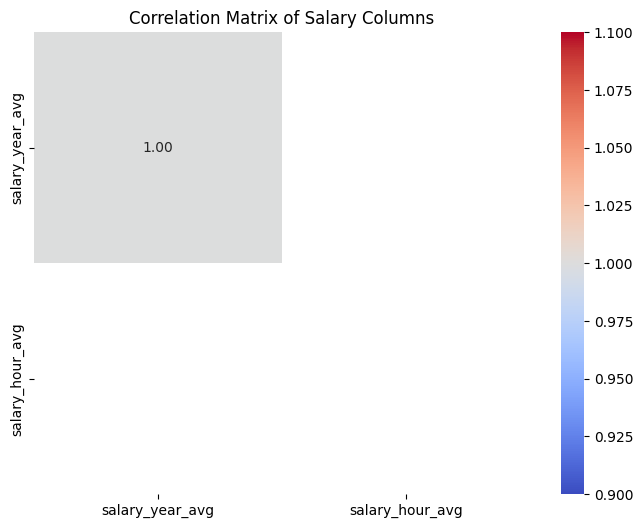

In [39]:
# Cell 10: Exploratory Data Analysis (EDA) - Correlation Analysis

if df is not None:
    # Correlation matrix for numerical columns
    numerical_cols = ['salary_year_avg', 'salary_hour_avg']
    correlation_matrix = df[numerical_cols].corr()

    # Heatmap of the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Salary Columns')
    plt.show()

# Insight Generation - Summarization Notes

This cell summarizes the key findings and insights from the data analysis.

**Key Findings:**

* **Top Job Schedule Types:** Lists the top 5 most common job schedule types.
* **Work From Home Distribution:** Shows the percentage of jobs that offer work-from-home options.
* **Monthly Job Postings Trend:** Displays the trend of job postings over time, aggregated by month.
* **Top Job Countries:** Lists the top 5 countries with the highest number of job postings.
* **Average Salaries:** Reports the average yearly and hourly salaries.
* **Correlation between Salary Columns:** Shows the correlation coefficient between yearly and hourly salaries.
* **Job work from home vs Salary average:** displays the average salary of year and hours, grouped by work from home column.

This summary provides a concise overview of the most important insights extracted from the job posting data.

In [40]:
# Cell 11: Insight Generation - Summarization

if df is not None:
    print("Job Market Insight Report - Key Findings:")

    # Top Job Schedule Types
    top_schedule = df['job_schedule_type'].value_counts().nlargest(5)
    print("\nTop 5 Job Schedule Types:")
    print(top_schedule)

    # Work From Home Distribution
    wfh_counts = df['job_work_from_home'].value_counts(normalize=True) * 100
    print("\nWork From Home Distribution (Percentage):")
    print(wfh_counts)

    # Monthly Job Postings Trend
    if 'job_posted_date' in df.columns and pd.api.types.is_datetime64_any_dtype(df['job_posted_date']):
        monthly_counts = df['job_posted_date'].dt.to_period('M').value_counts().sort_index()
        print("\nMonthly Job Postings Trend:")
        print(monthly_counts)

    # Top Job Countries
    top_countries = df['job_country'].value_counts().nlargest(5)
    print("\nTop 5 Job Countries:")
    print(top_countries)

    # Average Salaries
    print("\nAverage Salary (Year):", df['salary_year_avg'].mean())
    print("Average Salary (Hour):", df['salary_hour_avg'].mean())

    # Correlation between Salary Columns
    numerical_cols = ['salary_year_avg', 'salary_hour_avg']
    correlation = df[numerical_cols].corr().iloc[0, 1]
    print(f"\nCorrelation between Salary Year and Hour: {correlation:.2f}")

    # Job work from home vs salary year average
    print('\nJob work from home vs salary year average')
    print(df.groupby('job_work_from_home')['salary_year_avg'].mean())

    # Job work from home vs salary hour average
    print('\nJob work from home vs salary hour average')
    print(df.groupby('job_work_from_home')['salary_hour_avg'].mean())

Job Market Insight Report - Key Findings:

Top 5 Job Schedule Types:
job_schedule_type
Full-time                   25266
Contractor                   4284
Full-time and Part-time      1650
Contractor and Temp work      517
Part-time                     256
Name: count, dtype: int64

Work From Home Distribution (Percentage):
job_work_from_home
False    81.760583
True     18.239417
Name: proportion, dtype: float64

Monthly Job Postings Trend:
job_posted_date
2023-01    3102
2023-02    2533
2023-03    2927
2023-04    2588
2023-05    2646
2023-06    3234
2023-07    2883
2023-08    3554
2023-09    2640
2023-10    2552
2023-11    1963
2023-12    2049
Freq: M, Name: count, dtype: int64

Top 5 Job Countries:
job_country
United States     25140
Sudan              2680
India               589
Canada              503
United Kingdom      285
Name: count, dtype: int64

Average Salary (Year): 118032.26213279743
Average Salary (Hour): 46.0

Correlation between Salary Year and Hour: nan

Job work from

In [ ]:
import json
import os

def json_to_ipynb(json_file_path, ipynb_file_path):
    """Converts a JSON file to an ipynb file.

    Args:
        json_file_path: Path to the input JSON file.
        ipynb_file_path: Path to the output ipynb file.
    """
    with open(json_file_path, 'r', encoding='utf-8') as f:
        notebook_data = json.load(f)

    with open(ipynb_file_path, 'w', encoding='utf-8') as f:
        json.dump(notebook_data, f, indent=4)

    print(f"Converted '{json_file_path}' to '{ipynb_file_path}'")

# Example usage:
json_file_path = '/content/code.txt'  # Replace with your JSON file path
ipynb_file_path = '/content/my_notebook.ipynb'  # Replace with desired output path

json_to_ipynb(json_file_path, ipynb_file_path)

In [42]:
import json
import os

def txt_to_ipynb(txt_file_path, ipynb_file_path):
    """Converts a .txt file containing JSON data to an ipynb file.

    Args:
        txt_file_path: Path to the input .txt file.
        ipynb_file_path: Path to the output ipynb file.
    """
    with open(txt_file_path, 'r', encoding='utf-8') as f:
        notebook_data = json.load(f)

    with open(ipynb_file_path, 'w', encoding='utf-8') as f:
        json.dump(notebook_data, f, indent=4)

    print(f"Converted '{txt_file_path}' to '{ipynb_file_path}'")

# Example usage:
txt_file_path = '/content/code.txt'  # Replace with your .txt file path
ipynb_file_path = '/content/my_notebook.ipynb'  # Replace with desired output path

txt_to_ipynb(txt_file_path, ipynb_file_path)

Converted '/content/code.txt' to '/content/my_notebook.ipynb'
